In [1]:
pip install envirocar-py --upgrade

Requirement already up-to-date: envirocar-py in /opt/anaconda3/lib/python3.7/site-packages (0.0.2)


Note: you may need to restart the kernel to use updated packages.


# Package loading and basic configurations

In [2]:
%load_ext autoreload
%autoreload 2

# load dependencies'
import pandas as pd
import geopandas as gpd
import numpy as np
import scipy as sp
import folium 

from envirocar import TrackAPI, DownloadClient, BboxSelector, ECConfig

# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))

# Querying enviroCar Tracks

The following cell queries tracks from the enviroCar API. It defines a bbox for the area of Münster (Germany) and requests 50 tracks. The result is a GeoDataFrame, which is a geo-extended Pandas dataframe from the GeoPandas library. It contains all information of the track in a flat dataframe format including a specific geometry column. 

In [3]:
bbox = BboxSelector([
    6.7545318603515625, # min_x
    51.19655766797793, # min_y
    6.837615966796874, # max_x
    51.24859296175531  # max_y
])

# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=50) # requesting 50 tracks inside the bbox
track_df


,id,time,geometry,Intake Temperature.value,Intake Temperature.unit,GPS Bearing.value,GPS Bearing.unit,Speed.value,Speed.unit,GPS Speed.value,...,track.appVersion,track.touVersion,O2 Lambda Voltage.value,O2 Lambda Voltage.unit,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit,Intake Pressure.value,Intake Pressure.unit,Calculated MAF.value,Calculated MAF.unit
0,5c914e2d44ea850302816c0c,2019-03-19T18:59:56,POINT (6.77171 51.23097),36.000000,c,10.765564,deg,38.000000,km/h,38.448582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5c914e2d44ea850302816c0e,2019-03-19T18:59:58,POINT (6.77172 51.23123),36.000000,c,6.199196,deg,39.000000,km/h,39.391880,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5c914e2d44ea850302816c0f,2019-03-19T18:59:59,POINT (6.77172 51.23134),NaN,NaN,5.546331,deg,38.000000,km/h,37.426327,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5c914e2d44ea850302816c10,2019-03-19T19:00:02,POINT (6.77172 51.23154),36.000000,c,NaN,NaN,36.000000,km/h,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5c914e2d44ea850302816c11,2019-03-19T19:00:03,POINT (6.77172 51.23173),36.000000,c,1.603290,deg,38.000000,km/h,37.458496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,578a8d86e4b086b281a8f551,2016-07-16T11:57:51,POINT (6.77924 51.22370),45.999999,c,349.831640,deg,16.314505,km/h,31.706002,...,NaN,NaN,NaN,NaN,NaN,NaN,37.736434,kPa,3.194601,g/s
310,578a8d86e4b086b281a8f552,2016-07-16T11:57:56,POINT (6.77929 51.22384),45.999999,c,28.147209,deg,0.988575,km/h,8.439734,...,NaN,NaN,NaN,NaN,NaN,NaN,36.362738,kPa,3.041045,g/s
311,578a8d86e4b086b281a8f553,2016-07-16T11:58:01,POINT (6.77949 51.22381),46.346853,c,61.391709,deg,3.566974,km/h,7.919817,...,NaN,NaN,NaN,NaN,NaN,NaN,83.569035,kPa,8.508231,g/s
312,578a8d86e4b086b281a8f554,2016-07-16T11:58:06,POINT (6.77943 51.22382),45.999999,c,10.376024,deg,12.975335,km/h,3.712388,...,NaN,NaN,NaN,NaN,NaN,NaN,33.717421,kPa,4.842824,g/s


In [4]:
len(track_df.dtypes)

54

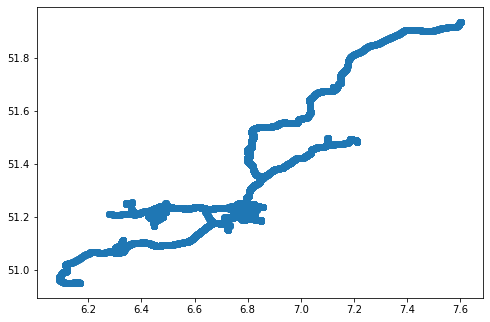

In [5]:
track_df.plot(figsize=(8, 10))

# Inspecting a single Track

In [6]:
track_df.groupby(track_df['track.id']).count()

,id,time,geometry,Intake Temperature.value,Intake Temperature.unit,GPS Bearing.value,GPS Bearing.unit,Speed.value,Speed.unit,GPS Speed.value,...,track.appVersion,track.touVersion,O2 Lambda Voltage.value,O2 Lambda Voltage.unit,O2 Lambda Voltage ER.value,O2 Lambda Voltage ER.unit,Intake Pressure.value,Intake Pressure.unit,Calculated MAF.value,Calculated MAF.unit
track.id,,,,,,,,,,,,,,,,,,,,,
578a8d86e4b086b281a8f419,314,314,314,314,314,264,264,314,314,314,...,0,0,0,0,0,0,314,314,314,314
578a8d90e4b086b281a8f7cb,375,375,375,375,375,356,356,375,375,375,...,0,0,0,0,0,0,375,375,375,375
578e27bee4b086b281b382eb,490,490,490,490,490,490,490,490,490,490,...,0,0,0,0,0,0,490,490,0,0
57936bcfe4b086b281bbfab0,263,263,263,263,263,263,263,263,263,263,...,0,0,0,0,0,0,263,263,0,0
57936bd2e4b086b281bc00c2,292,292,292,292,292,292,292,292,292,292,...,0,0,0,0,0,0,292,292,0,0
5794715ce4b086b281bd4015,235,235,235,235,235,232,232,235,235,235,...,0,0,0,0,0,0,235,235,0,0
57a0cb9fe4b086b281cc6d4d,378,378,378,378,378,378,378,378,378,378,...,0,0,0,0,0,0,378,378,0,0
57a0cba2e4b086b281cc71bf,592,592,592,592,592,592,592,592,592,592,...,0,0,0,0,0,0,592,592,0,0
57a219aee4b086b281cdab16,344,344,344,344,344,344,344,344,344,344,...,0,0,0,0,0,0,344,344,0,0


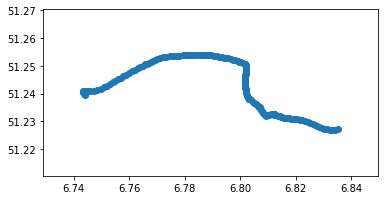

In [7]:
some_track_id = track_df['track.id'].unique()[12]
some_track = track_df[track_df['track.id'] == some_track_id]
some_track.plot()

In [8]:
track_df['Engine Load.value'].describe()

count    23493.000000
mean        25.612165
std         22.069443
min          0.000000
25%          8.627451
50%         19.215687
75%         36.862743
max        100.000003
Name: Engine Load.value, dtype: float64

In [9]:
track_df.dtypes

id                              object
time                            object
geometry                      geometry
Intake Temperature.value       float64
Intake Temperature.unit         object
GPS Bearing.value              float64
GPS Bearing.unit                object
Speed.value                    float64
Speed.unit                      object
GPS Speed.value                float64
GPS Speed.unit                  object
GPS VDOP.value                 float64
GPS VDOP.unit                   object
MAF.value                      float64
MAF.unit                        object
Consumption.value              float64
Consumption.unit                object
GPS PDOP.value                 float64
GPS PDOP.unit                   object
CO2.value                      float64
CO2.unit                        object
GPS Accuracy.value             float64
GPS Accuracy.unit               object
Rpm.value                      float64
Rpm.unit                        object
GPS Altitude.value       

In [10]:
len(some_track)

239

In [11]:
some_track_length = some_track['track.length'].sum()
some_track_length

2166.0580114992076

In [12]:
some_track['Engine Load.value'].dropna

<bound method Series.dropna of 0      51.960783
1      27.593357
2      23.458965
3      32.019827
4      49.339885
         ...    
234    21.050807
235    45.934256
236    55.110368
237    15.467668
238     9.019607
Name: Engine Load.value, Length: 239, dtype: float64>

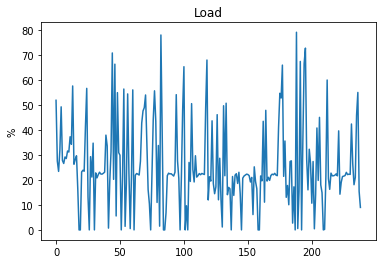

In [13]:
ax = some_track['Engine Load.value'].plot()
ax.set_title("Load")
ax.set_ylabel(some_track['Engine Load.unit'][0])
ax

## Interactive Map
The following map-based visualization makes use of folium. It allows to visualizate geospatial data based on an interactive leaflet map. Since the data in the GeoDataframe is modelled as a set of Point instead of a LineString, we have to manually create a polyline

In [14]:
import folium

lats = list(some_track['geometry'].apply(lambda coord: coord.y))
lngs = list(some_track['geometry'].apply(lambda coord: coord.x))

avg_lat = sum(lats) / len(lats)
avg_lngs = sum(lngs) / len(lngs)

m = folium.Map(location=[avg_lat, avg_lngs], zoom_start=13)
folium.PolyLine([coords for coords in zip(lats, lngs)], color='blue').add_to(m)
m

# Example: Visualization with pydeck (deck.gl)

The pydeck library makes use of the basemap tiles from Mapbox. In case you want to visualize the map with basemap tiles, you need to register with MapBox, and configure a specific access token. The service is free until a certain level of traffic is esceeded.

You can either configure it via your terminal (i.e. `export MAPBOX_API_KEY=<mapbox-key-here>`), which pydeck will automatically read, or you can pass it as a variable to the generation of pydeck (i.e. `pdk.Deck(mapbox_key=<mapbox-key-here>, ...)`.

In [18]:
import pydeck as pdk

# for pydeck the attributes have to be flat
track_df['lat'] = track_df['geometry'].apply(lambda coord: coord.y)
track_df['lng'] = track_df['geometry'].apply(lambda coord: coord.x)
vis_df = pd.DataFrame(track_df)
vis_df['speed'] = vis_df['Speed.value']

# omit unit columns
vis_df_cols = [col for col in vis_df.columns if col.lower()[len(col)-4:len(col)] != 'unit']
vis_df = vis_df[vis_df_cols]

layer = pdk.Layer(
    'ScatterplotLayer',
    data=vis_df,
    get_position='[lng, lat]',
    auto_highlight=True,
    get_radius=10,          # Radius is given in meters
    get_fill_color='[speed < 20 ? 0 : (speed - 20)*8.5, speed < 50 ? 255 : 255 - (speed-50)*8.5, 0, 140]',  # Set an RGBA value for fill
    pickable=True
)

# Set the viewport location
view_state = pdk.ViewState(
    longitude=7.5963592529296875,
    latitude=51.96246168188569,
    zoom=10,
    min_zoom=5,
    max_zoom=15,
    pitch=40.5,
    bearing=-27.36)

r = pdk.Deck(
    width=200, 
    layers=[layer], 
    initial_view_state=view_state #, mapbox_key=<mapbox-key-here>
)
r.to_html('tracks_muenster.html', iframe_width=900)

/opt/anaconda3/lib/python3.7/site-packages/pydeck/bindings/deck.py:83: UserWarning: Mapbox API key is not set. This may impact available features of pydeck.
  UserWarning,


'/Users/davidsimduwaalsina/Documents/GitHub/envirocar-py/examples/tracks_muenster.html'